In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    plt.imshow(img, cmap="gray")

In [3]:
reeses = cv2.imread("DATA/reeses_puffs.png",0)

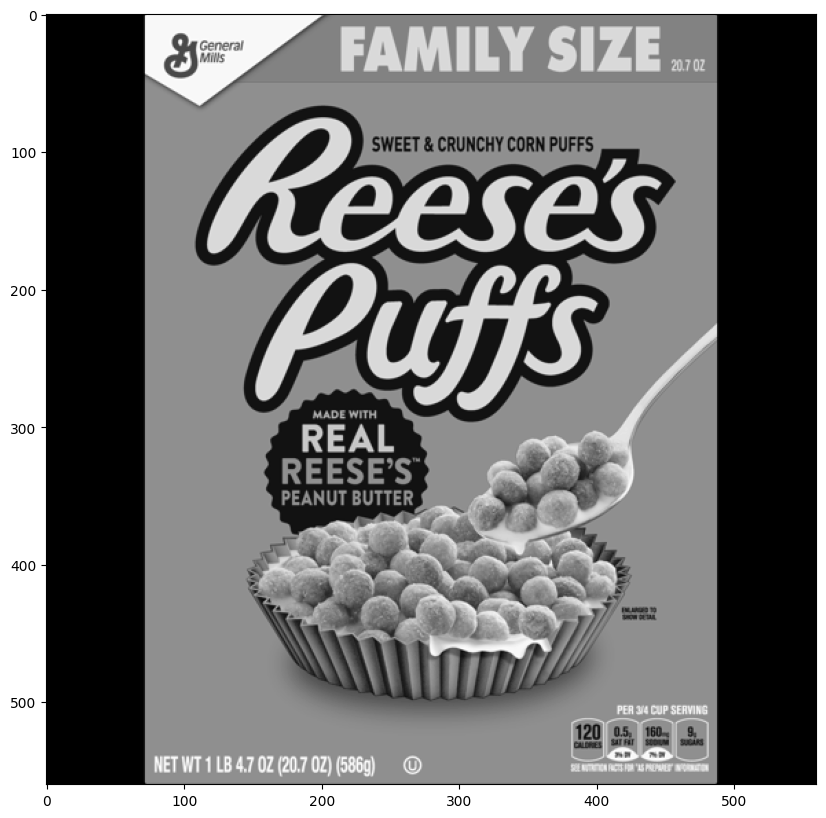

In [4]:
display(reeses)



In [5]:
# Loading the cereals 
cereals = cv2.imread("DATA/many_cereals.jpg",0)

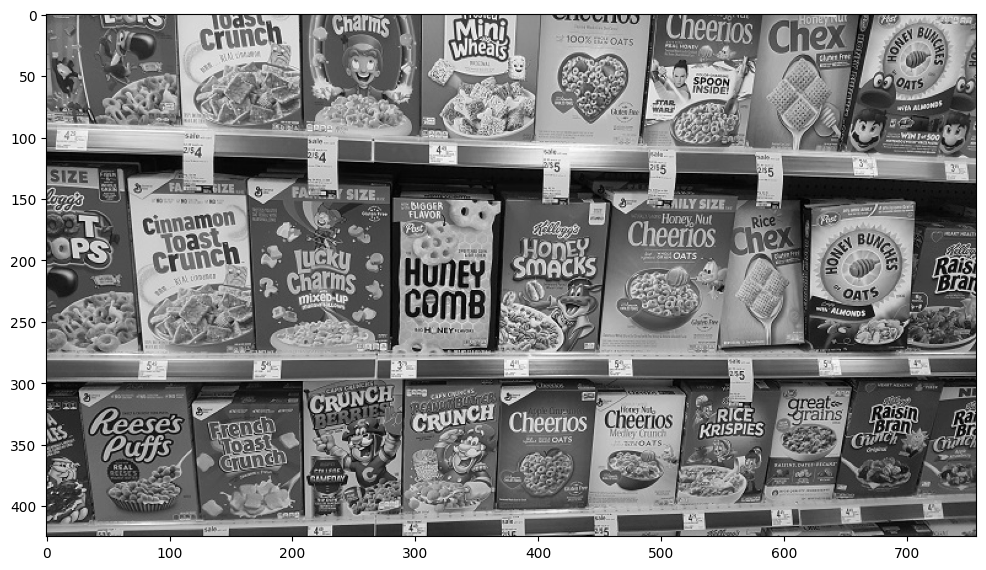

In [6]:
display(cereals)

In [7]:
orb = cv2.ORB_create()

In [8]:
kp1, ds1 = orb.detectAndCompute(reeses,None)
kp2, ds2 = orb.detectAndCompute(cereals,None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [10]:
matches = bf.match(ds1,ds2)

In [11]:
len(matches)

139

In [12]:
matches = sorted(matches, key=lambda x: x.distance)

In [13]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25], None,flags=2)

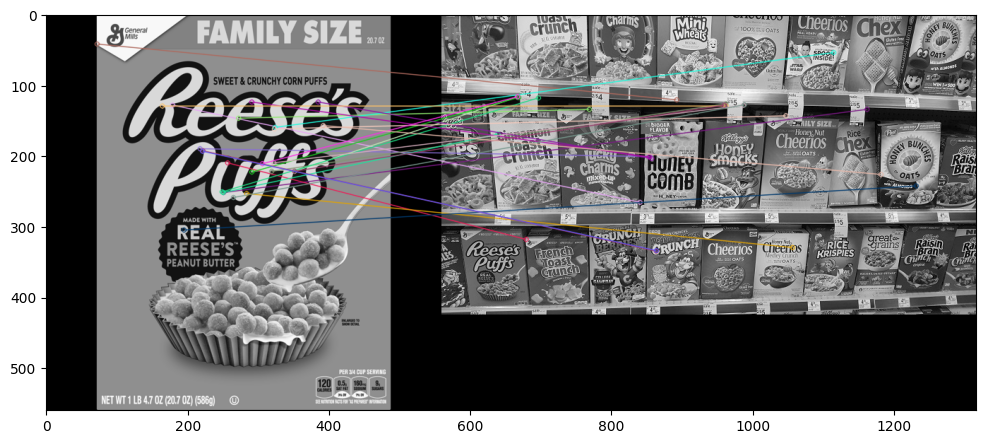

In [14]:
display(reeses_matches)

for better performance we can use sift descriptors, this method is better than ORB if the two images have a different size 

In [18]:
sift = cv2.xfeatures2d.SIFT_create()

In [20]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp1, des2 = sift.detectAndCompute(cereals,None)

In [21]:
bf = cv2.BFMatcher()

In [33]:
matches = bf.knnMatch(des1,des2,k=2 )

In [34]:
good = []
# use a ratio distance check
for match1, match2 in matches:
    if match1.distance < 0.75* match2.distance: #good match
         good.append([match1])

In [35]:
len(good)

79

In [36]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None, flags=2)

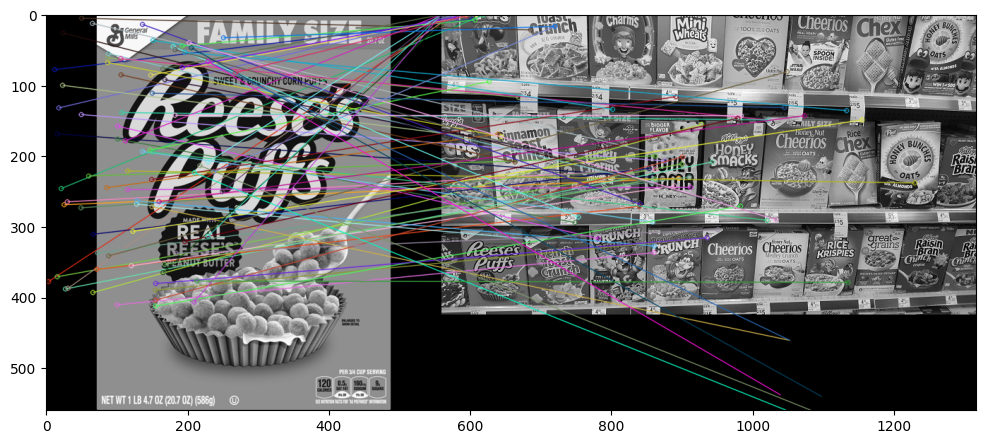

In [37]:
display(sift_matches)